In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.shape

(1000, 8)

In [4]:
data_train = data[:700]

In [5]:
data_train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
gender                         700 non-null object
race/ethnicity                 700 non-null object
parental level of education    700 non-null object
lunch                          700 non-null object
test preparation course        700 non-null object
math score                     700 non-null int64
reading score                  700 non-null int64
writing score                  700 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.8+ KB


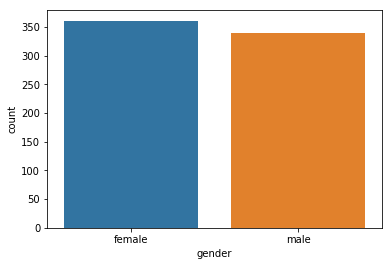

In [7]:
sns.countplot(data_train['gender'])

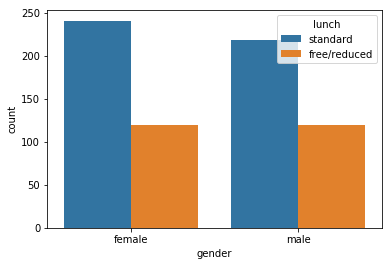

In [8]:
sns.countplot(data_train['gender'], hue = data_train['lunch'])

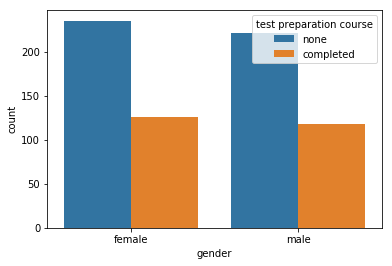

In [9]:
sns.countplot(data_train['gender'] ,hue = data_train['test preparation course'])

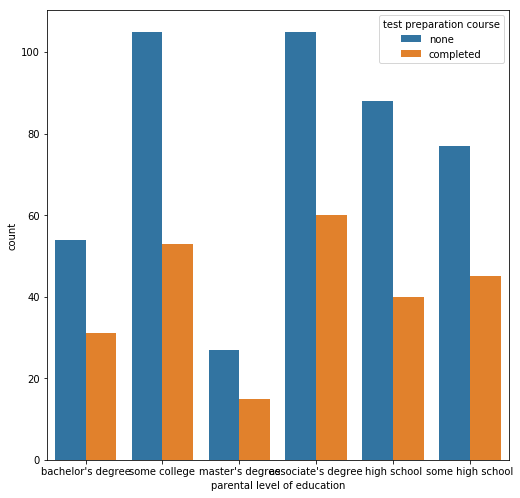

In [10]:
a4_dims = (8.27, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
sns.countplot(data_train['parental level of education'], hue = data_train['test preparation course'])

In [11]:
# how much boys and girls with high math grades(>70)
data_train[data_train['math score']>70]['gender'].value_counts()

male      156
female    119
Name: gender, dtype: int64

In [12]:
# how much boys and girls with high grades
data_train[(data_train['math score']>70) & (data_train['reading score']>70)
           & (data_train['writing score']>70)]['gender'].value_counts()

female    116
male       93
Name: gender, dtype: int64

In [13]:
# how much students from each race have high grades
data_train[(data_train['math score']>70) & (data_train['reading score']>70)
           & (data_train['writing score']>70)]['race/ethnicity'].value_counts()

group D    64
group C    58
group E    41
group B    33
group A    13
Name: race/ethnicity, dtype: int64

In [14]:
# how much students with high grades completes test preparation course
data_train[(data_train['math score']>70) & (data_train['reading score']>70) 
           & (data_train['writing score']>70)]['test preparation course'].value_counts()

none         117
completed     92
Name: test preparation course, dtype: int64

In [15]:
categorical_cols = [col for col in data_train.columns if data_train[col].dtype == 'object']
categorical_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
data_train[categorical_cols] = data_train[categorical_cols].apply(lambda col: le.fit_transform(col))
data_train[categorical_cols].head(10)

/home/olha/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1
5,0,1,0,1,1
6,0,1,4,1,0
7,1,1,4,0,1
8,1,3,2,0,0
9,0,1,2,0,1


In [18]:
X_train = data_train.iloc[:, 3:]

In [19]:
y_train_math = data_train['math score']
y_train_read = data_train['reading score']
y_train_write = data_train['writing score']

In [20]:
data_test = data.iloc[700: :]
data_test.shape

(300, 8)

In [21]:
data_test[categorical_cols] = data_test[categorical_cols].apply(lambda col: le.fit_transform(col))
data_test[categorical_cols].head(10)

/home/olha/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,gender,race/ethnicity,parental level of education,lunch,test preparation course
700,0,4,1,1,0
701,0,1,5,1,1
702,1,0,1,1,0
703,0,3,4,1,1
704,0,1,5,0,0
705,1,0,1,0,1
706,1,3,2,1,1
707,1,2,4,1,1
708,1,3,2,1,1
709,0,3,0,0,0


In [22]:
X_test = data_test.iloc[:, 3:]
y_test_math = data_test['math score']
y_test_read = data_test['reading score']
y_test_write = data_test['writing score']

In [23]:
corr_matrix  = data_train.corr()

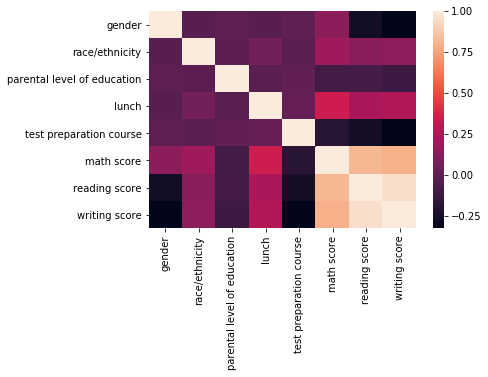

In [24]:
sns.heatmap(corr_matrix)

In [25]:
from sklearn.tree import DecisionTreeRegressor 
def create_tree(max_depth, min_samples_split, min_samples_leaf, max_features):
    regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features = max_features)
    return regressor

In [26]:
train_score_math = create_tree(3, 3, 2, 4)
train_score_read = create_tree(2, 3, 4, 2)
train_score_write = create_tree(3, 4, 5, 4)

In [27]:
from sklearn.model_selection import GridSearchCV
def best_params(estimator, param_grid, n_jobs, X, y, cv = 4):
    clf = GridSearchCV(estimator, param_grid, n_jobs=None)
    clf.fit(X,y)
    print('Best params:', clf.best_params_)
    print('Best CV Score:', clf.best_score_)

In [28]:
grade_params = {'max_depth':[1,2,3],
               'min_samples_split':[5,6,7],
              'min_samples_leaf':[2,3,4],
              'max_features': [3,4,5]}

In [29]:
best_params(train_score_math , grade_params, -1, X_train, y_train_math)

/home/olha/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best params: {'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 7}
Best CV Score: 0.9597988427875849


/home/olha/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
best_params(train_score_read, grade_params, -1, X_train, y_train_read)

/home/olha/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best params: {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV Score: 0.9645925750689045


In [31]:
best_params(train_score_write, grade_params, -1, X_train, y_train_write)

/home/olha/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best params: {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV Score: 0.9664940227121187


In [32]:
math_regressor = DecisionTreeRegressor(max_depth = 3, max_features = 5, min_samples_leaf = 2, min_samples_split = 5)
math_regressor.fit(X_train, y_train_math)
math_regressor.score(X_test, y_test_math)

0.9635535835301714

In [33]:
read_regressor = DecisionTreeRegressor(max_depth = 3, max_features = 4, min_samples_leaf = 3, min_samples_split = 6)
read_regressor.fit(X_train, y_train_read)
read_regressor.score(X_test, y_test_read)

0.9472774197567398

In [34]:
write_regressor = DecisionTreeRegressor(max_depth = 3, max_features = 4, min_samples_leaf = 3, min_samples_split = 6)
write_regressor.fit(X_train, y_train_write)
write_regressor.score(X_test, y_test_write)

0.9636049110048612